### Exercise 1: Neighbourhood

_Question1.1_<br/>
For $ G=(V,E) $, the reverse neighbourhood of $ v $, denoted as $N_{in}(v)=\{u\in V:(u,v)\in E\}$, which consists of all nodes that have incoming edges to $ v $; and $N_{out}(v)=\{u\in V:(v,u)\in E\}$ was consists of all nodes that have outgoing edges to $ v $.
<br/>
So the combined degree is $k_{combined}(v)=|N_{out}(v)\cup N_{in}(v)|$

_Question1.2_<br/>
For $ G=(V,E) $,   $ \forall v\in V,\quad N_{out}(v)=N_{in}(v) $

_Question1.3_<br/>
For $ G=(V,E) $,   $\forall v\in V,\quad\forall u,w\in N(v),\quad(u,w)\notin E$
<br/>
$\quad(u,w)$ means the edges between node $u$ and $w$

_Question1.4_<br/>
K-neighborhood: The k-neighborhood means node $v$ in a graph is the set of all nodes that can be reached from $v$ within $k$ steps.<br/>
Reversed Neighborhood: The reversed neighborhood of a node $v$, is the set of all vertices that have an edge pointing to $v$. <br/>
Based on above, The reversed k-neighborhood of a node $v$ is the set of vertices that can reach $v$ within $k$ steps.

_Question1.5_<br/>
```
def is_same_weakly_connected_component(G, u, v):
    N_u = set(nx.descendants(G, u)).union(set(nx.ancestors(G, u)), {u})
    N_v = set(nx.descendants(G, v)).union(set(nx.ancestors(G, v)), {v})
    
    return bool(N_u.intersection(N_v))
```
nx.descendants(G, u) and nx.ancestors(G, u) give the out-neighborhood and in-neighborhood of u respectively, and intersection() check if the neighborhoods overlap.

_Question1.6_<br/>
```
def is_dependent_on(G, a, b):
     return nx.has_path(G, a, b)
```

_Question1.7_<br/>
```
import networkx as nx
from itertools import combinations

def count_open_wedges(G):
    open_wedge_count = 0

    for v in G.nodes():
   
        neighbors = list(G.neighbors(v))
        
        for u, w in combinations(neighbors, 2):
            if not G.has_edge(u, w):
                # Count as an open wedge (u, v, w)
                open_wedge_count += 1
    
    return open_wedge_count
```
We need looking over all nodes(V),  For each node, finding the set of neighbors, takes $O(\deg(v))$, $\deg(v)$ s the degree (number of neighbors) of node $v$. For each node $v$, we check all pairs of neighbors, so is $O(\deg(v)^2)$. <br/>
Thus, the time complexity for each node is: $O(\deg(v)^2)$<br/>
So the overall time complexity of the algorithm is:
$O\left(\sum_{v\in V}\deg(v)^2\right)$

_Question1.8_<br/>

```
def friendship_paradox_count(G):
    count = 0
    
    for u in G.nodes():
        deg_u = G.degree(u)
        
        neighbors = G.neighbors(u)
        
        if deg_u > 0:  
            avg_deg_neighbors = sum(G.degree(v) for v in neighbors) / deg_u
        
            if avg_deg_neighbors > deg_u:
                count += 1
    
    return count
```
For $G=(V,E)$, each node $u$, the degree can be obtained in constant time,$O(1)$, summing the degrees of its neighbors involves iterating over the neighbors, which is $O(E)$, this algorithm iterates over all the nodes, and for each node, it performs a calculation proportional to the number of its neighbors. So the time complexity is $O(|V|+|E|)$.

_Question1.9_<br/>

The diameter of a graph $G$ is the greatest distance between any two nodes in the graph. This distance is the length of the longest shortest path between any pair of nodes. eccentricity measures the maximum distance from a node to any other node, the diameter is the maximum eccentricity among all nodes in the graph.
<br/>
Eccentricity: $e(v)=\max_{u\in V}\operatorname{dist}(v,u)$<br/>
Diameter: $D(G)=\max_{v\in V}e(v)$

#### Exercise 2:Mining An Online Social Network

|   |  medium |  large |
|---|---|---|
|  2.1 |   8888|  889007 |
|  2.2 |  2158 |  100312 |
|  2.4 |  1, 443, 1716, 8387, 2158, 8888|  304, 38951, 60575, 705767, 99634, 888602  |
|  2.5 |  0.2751 |  0.2607 |
|  2.7 |  3.0767 |   |

In [1]:
import networkx as nx
import pandas as pd

In [2]:
# medium
medium_df = pd.read_csv('medium.tsv', sep='\t', header=None)

G_medium = nx.DiGraph()

edges = list(zip(medium_df[0], medium_df[1]))
G_medium.add_edges_from(edges)

strongly_connected_components = list(nx.strongly_connected_components(G_medium))
num_strongly_connected_components = len(strongly_connected_components)

weakly_connected_components = list(nx.weakly_connected_components(G_medium))
num_weakly_connected_components = len(weakly_connected_components)

print(f"number of strongly connected components: {num_strongly_connected_components}")
print(f"number of weak connected components: {num_weakly_connected_components}")

number of strongly connected components: 443
number of weak connected components: 1


In [3]:
strongly_connected_components = list(nx.strongly_connected_components(G_medium))
largest_scc = max(strongly_connected_components, key=len)  # Largest SCC by nodes

# Create a subgraph
largest_scc_subgraph = G_medium.subgraph(largest_scc)

weakly_connected_components = list(nx.weakly_connected_components(G_medium))
largest_wcc = max(weakly_connected_components, key=len)  

largest_wcc_subgraph = G_medium.subgraph(largest_wcc)

# Count the number
scc_nodes_num = largest_scc_subgraph.number_of_nodes()
scc_edges_num = largest_scc_subgraph.number_of_edges()

wcc_nodes_num = largest_wcc_subgraph.number_of_nodes()
wcc_edges_num = largest_wcc_subgraph.number_of_edges()

print(f"largest strongly connected component has {scc_nodes_num} nodes, {scc_edges_num} links")
print(f"largest weakly connected component has {wcc_nodes_num} nodes, {wcc_edges_num} links")

largest strongly connected component has 1716 nodes, 8387 links
largest weakly connected component has 2158 nodes, 8888 links


In [4]:
avg_clustering_coefficient_medium = nx.average_clustering(G_medium.to_undirected(), count_zeros=True)
avg_clustering_coefficient_medium = round(avg_clustering_coefficient_medium, 4)
avg_clustering_coefficient_medium

0.2751

I use directed clustering functions available in Networkx 

In [5]:
largest_wcc_subgraph = G_medium.subgraph(largest_wcc).to_undirected()
if nx.is_connected(largest_wcc_subgraph):
    avg_path_length = nx.average_shortest_path_length(largest_wcc_subgraph)
    avg__path_length = round(avg_path_length, 4)
avg__path_length

3.0767

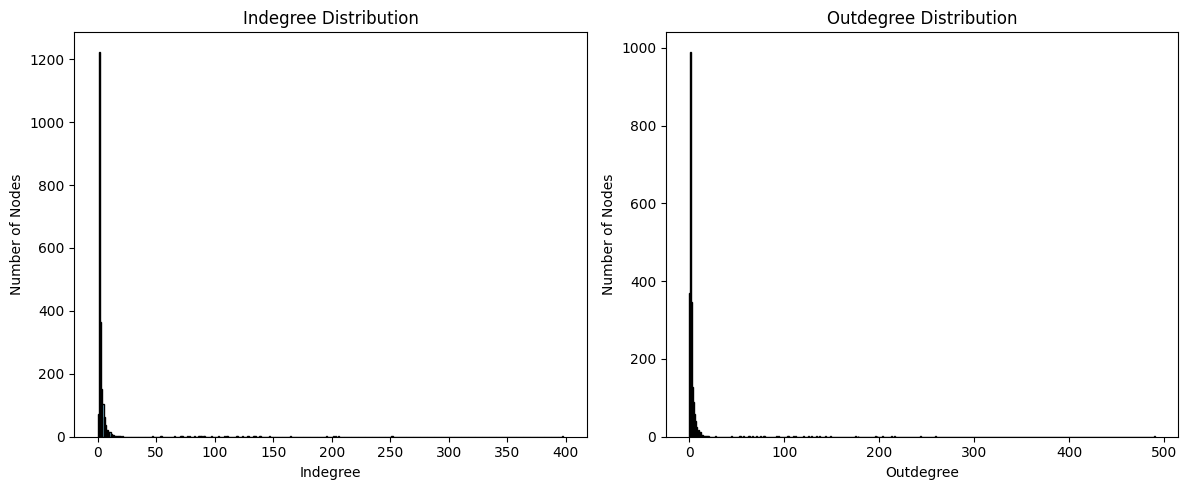

In [3]:
#2.3
import networkx as nx
import matplotlib.pyplot as plt

def plot_degree_distributions(G):

    # Get indegree and outdegree for all nodes
    indegrees = [deg for _, deg in G.in_degree()]
    outdegrees = [deg for _, deg in G.out_degree()]
    
    # Create subplots for indegree and outdegree distributions
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the indegree distribution
    axs[0].hist(indegrees, bins=range(min(indegrees), max(indegrees) + 1), color='skyblue', edgecolor='black')
    axs[0].set_title('Indegree Distribution')
    axs[0].set_xlabel('Indegree')
    axs[0].set_ylabel('Number of Nodes')

    # Plot the outdegree distribution
    axs[1].hist(outdegrees, bins=range(min(outdegrees), max(outdegrees) + 1), color='lightgreen', edgecolor='black')
    axs[1].set_title('Outdegree Distribution')
    axs[1].set_xlabel('Outdegree')
    axs[1].set_ylabel('Number of Nodes')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming G is a directed graph (nx.DiGraph())
plot_degree_distributions(G_medium)


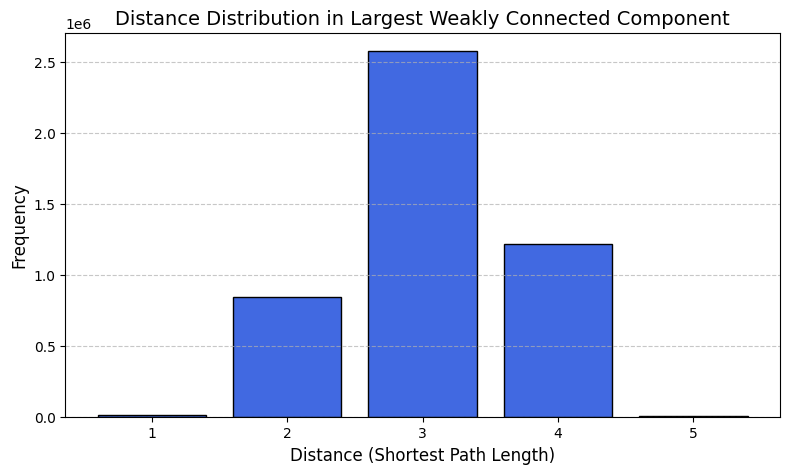

In [14]:
from collections import Counter

def plot_distance_distribution(G):
    """
    Plots the distance distribution of the largest weakly connected component of a directed graph.
    
    Args:
        G (networkx.DiGraph): The directed graph.
    """
    # Step 1: Get the largest weakly connected component (WCC)
    largest_wcc = max(nx.weakly_connected_components(G), key=len)
    largest_wcc_subgraph = G.subgraph(largest_wcc).to_undirected()

    # Step 2: Calculate shortest path lengths for all pairs in the largest WCC
    path_lengths = dict(nx.all_pairs_shortest_path_length(largest_wcc_subgraph))

    # Step 3: Collect all distances into a list
    distances = []
    for source, target_lengths in path_lengths.items():
        for target, length in target_lengths.items():
            if source != target:  # Exclude self-loops (distance = 0)
                distances.append(length)

    # Step 4: Count the frequency of each distance
    distance_counts = Counter(distances)
    distance_values, frequency = zip(*sorted(distance_counts.items()))  # Sort by distance

    # Step 5: Plot the distance distribution as a histogram
    plt.figure(figsize=(8, 5))
    plt.bar(distance_values, frequency, color='royalblue', edgecolor='black')
    plt.title('Distance Distribution in Largest Weakly Connected Component', fontsize=14)
    plt.xlabel('Distance (Shortest Path Length)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(distance_values)  # Ensure all distances are shown on the x-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming G is a directed graph (nx.DiGraph())
plot_distance_distribution(G_medium)

In [4]:
# large
large_df = pd.read_csv('large.tsv', sep='\t', header=None)

G_large = nx.DiGraph()

edges = list(zip(large_df[0], large_df[1]))
G_large.add_edges_from(edges)

strongly_connected_components = list(nx.strongly_connected_components(G_large))
num_strongly_connected_components = len(strongly_connected_components)

weakly_connected_components = list(nx.weakly_connected_components(G_large))
num_weakly_connected_components = len(weakly_connected_components)

print(f"number of strongly connected components: {num_strongly_connected_components}")
print(f"number of weak connected components: {num_weakly_connected_components}")

number of strongly connected components: 38951
number of weak connected components: 304


C:\Users\MJM\AppData\Local\Temp\ipykernel_15964\3001068724.py:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(G.nodes(), sample_size)


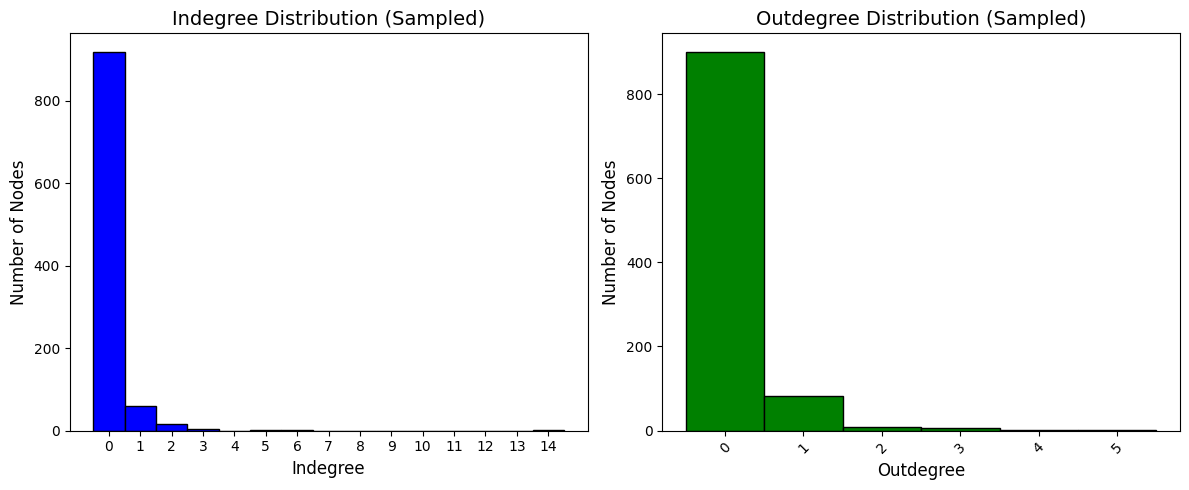

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def plot_sampled_degree_distributions(G, sample_size=1000):
    """
    Randomly samples nodes from the graph, creates a subgraph, and plots the indegree and outdegree distributions.
    
    Args:
        G (networkx.DiGraph): The directed graph from which to sample.
        sample_size (int): Number of nodes to sample for the subgraph (default 1000).
    """
    # Step 1: Randomly sample nodes
    sampled_nodes = random.sample(G.nodes(), sample_size)
    
    # Step 2: Create a subgraph with the sampled nodes
    sampled_subgraph = G.subgraph(sampled_nodes)
    
    # Get indegree and outdegree for all nodes in the sampled subgraph
    indegrees = [deg for _, deg in sampled_subgraph.in_degree()]
    outdegrees = [deg for _, deg in sampled_subgraph.out_degree()]

    # Step 3: Plot the indegree and outdegree distributions
    fig, axs = plt.subplots(1, 2, figsize=(12, 5), facecolor='white')

    # Custom colors
    indegree_color = 'blue'
    outdegree_color = 'green'

    # Define bins as integers for the histogram
    bins_indegree = range(min(indegrees), max(indegrees) + 2)  # +2 to include the last bin edge
    bins_outdegree = range(min(outdegrees), max(outdegrees) + 2)  # +2 to include the last bin edge

    # Plot the indegree distribution
    axs[0].hist(indegrees, bins=bins_indegree, color=indegree_color, edgecolor='black', align='left')
    axs[0].set_title('Indegree Distribution (Sampled)', fontsize=14)
    axs[0].set_xlabel('Indegree', fontsize=12)
    axs[0].set_ylabel('Number of Nodes', fontsize=12)
    axs[0].tick_params(axis='both', which='major', labelsize=10)
    axs[0].set_xticks(range(min(indegrees), max(indegrees) + 1))  # Set x-ticks to integers only
    plt.xticks(rotation=45) 

    # Plot the outdegree distribution
    axs[1].hist(outdegrees, bins=bins_outdegree, color=outdegree_color, edgecolor='black', align='left')
    axs[1].set_title('Outdegree Distribution (Sampled)', fontsize=14)
    axs[1].set_xlabel('Outdegree', fontsize=12)
    axs[1].set_ylabel('Number of Nodes', fontsize=12)
    axs[1].tick_params(axis='both', which='major', labelsize=10)
    axs[1].set_xticks(range(min(outdegrees), max(outdegrees) + 1))  # Set x-ticks to integers only
    plt.xticks(rotation=45) 
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming G is a directed graph (nx.DiGraph())
plot_sampled_degree_distributions(G_large)


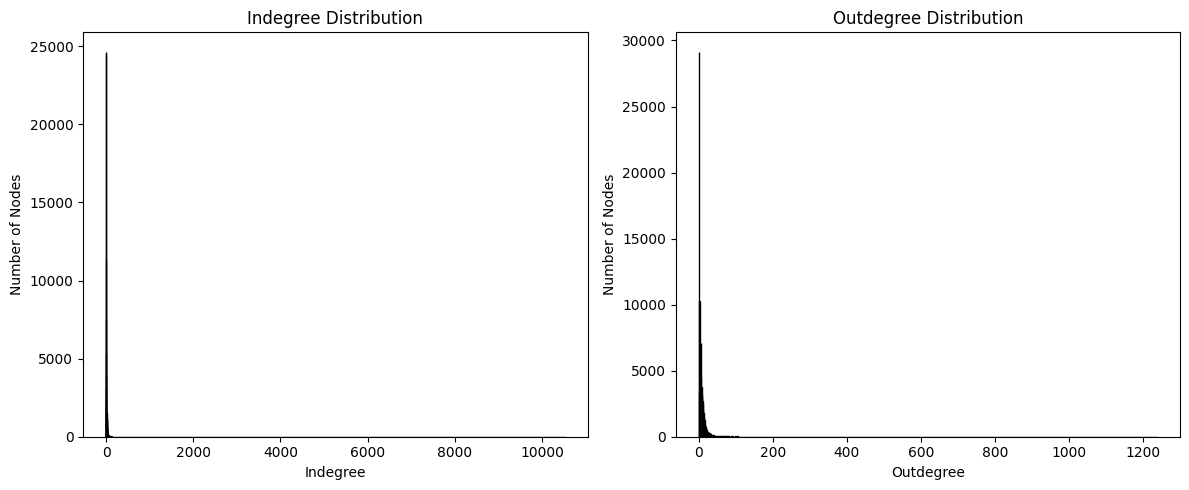

In [9]:
plot_degree_distributions(G_large)

In [15]:
plot_distance_distribution(G_large)

KeyboardInterrupt: 

In [7]:
strongly_connected_components = list(nx.strongly_connected_components(G_large))
largest_scc = max(strongly_connected_components, key=len)  # Largest SCC by nodes

# Create a subgraph
largest_scc_subgraph = G_large.subgraph(largest_scc)

weakly_connected_components = list(nx.weakly_connected_components(G_large))
largest_wcc = max(weakly_connected_components, key=len)  

largest_wcc_subgraph = G_large.subgraph(largest_wcc)

# Count the number
scc_nodes_num = largest_scc_subgraph.number_of_nodes()
scc_edges_num = largest_scc_subgraph.number_of_edges()

wcc_nodes_num = largest_wcc_subgraph.number_of_nodes()
wcc_edges_num = largest_wcc_subgraph.number_of_edges()

print(f"largest strongly connected component has {scc_nodes_num} nodes, {scc_edges_num} links")
print(f"largest weakly connected component has {wcc_nodes_num} nodes, {wcc_edges_num} links")

largest strongly connected component has 60575 nodes, 705767 links
largest weakly connected component has 99634 nodes, 888602 links


In [8]:
avg_clustering_coefficient_large = nx.average_clustering(G_large.to_undirected(), count_zeros=True)
avg_clustering_coefficient_large = round(avg_clustering_coefficient_large, 4)
avg_clustering_coefficient_large

KeyboardInterrupt: 

In [ ]:
import random
largest_wcc_subgraph = G_large.subgraph(largest_wcc).to_undirected()
# Sample a subset of nodes for BFS
sampled_nodes = random.sample(largest_wcc_subgraph.nodes(), 1000)
path_lengths = []
for node in sampled_nodes:
    path_lengths += list(nx.single_source_shortest_path_length(largest_wcc_subgraph, node).values())

# Calculate the average shortest path length for this subset
avg_path_length = sum(path_lengths) / len(path_lengths)
avg_path_length = round(avg_path_length, 4)
avg_path_length
